### 1. Importing the Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data Exploration

In [56]:
data = pd.read_csv("Startups1.csv")
data.head(15)

,Unnamed: 0,Company,City,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,0,Urban Company,Gurgaon,2014,1001-5000,445920356,12,16
1,1,Classplus,Noida,2018,101-250,89506451,10,20
2,2,Paytm,Noida,2010,501-1000,32448851,4,4
3,3,Apna,Mumbai,2019,101-250,93450000,4,6
4,4,Razorpay,Bengaluru,2014,1001-5000,366600000,7,29
5,5,UpGrad,Mumbai,2015,1001-5000,176283446,4,4
6,6,Delhivery,Gurgaon,2011,5001-10000,1236569361,11,13
7,7,1mg,Gurgaon,2015,Nov-50,204600209,16,17
8,8,BigBasket,Bengaluru,2011,5001-10000,1119863468,17,17
9,9,GoMechanic,Gurgaon,2016,251-500,59849371,8,9


In [57]:
data.shape

(300, 8)

In [58]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,300.0,1.495000e+02,8.674676e+01,0.0,74.75,149.5,2.242500e+02,2.990000e+02
Starting Year,300.0,2.013393e+03,5.139390e+00,1984.0,2012.00,2015.0,2.016000e+03,2.020000e+03
Funding Amount in $,300.0,3.148655e+08,1.628802e+09,0.0,14287377.00,41087733.5,1.319438e+08,2.476762e+10
Funding Round,300.0,5.986667e+00,4.239465e+00,0.0,3.00,5.0,7.000000e+00,2.500000e+01
No. of Investors,300.0,1.055000e+01,7.530151e+00,0.0,5.00,9.0,1.400000e+01,4.500000e+01


In [59]:
data.duplicated().sum()

0

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           300 non-null    int64 
 1   Company              300 non-null    object
 2   City                 300 non-null    object
 3   Starting Year        300 non-null    int64 
 4   No. of Employees     300 non-null    object
 5   Funding Amount in $  300 non-null    int64 
 6   Funding Round        300 non-null    int64 
 7   No. of Investors     300 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 18.9+ KB


* note 1:  no nulls
- ` next we explore the object type features`

In [61]:
print(data['Company'].value_counts())
print("============================================================\n")
print(data['City'].value_counts())

Urban Company            1
Fabhotels                1
Kissht                   1
Shipsy                   1
INDwealth                1
                        ..
MyMoneyMantra            1
Purplle                  1
OkCredit                 1
Paytm Payments Bank      1
HalaPlay Technologies    1
Name: Company, Length: 300, dtype: int64

Bengaluru       123
Mumbai           55
Gurgaon          47
New Delhi        22
Noida            12
Chennai           6
Hyderabad         5
Pune              4
Ahmedabad         4
Delhi             3
Haryana           3
Thane             2
Kormangala        2
Faridabad         2
Whitefield        1
Nungambakkam      1
Azadpur           1
Kilpauk           1
Patna City        1
Sohna             1
Kolkata           1
Surat             1
Andheri           1
Jaipur            1
Name: City, dtype: int64


- note 2: Company Names are all unique, and Cities are not explisive on small number of classes.

- `Object data types are not necessary for our analysis.`

### 3. Data Visualization

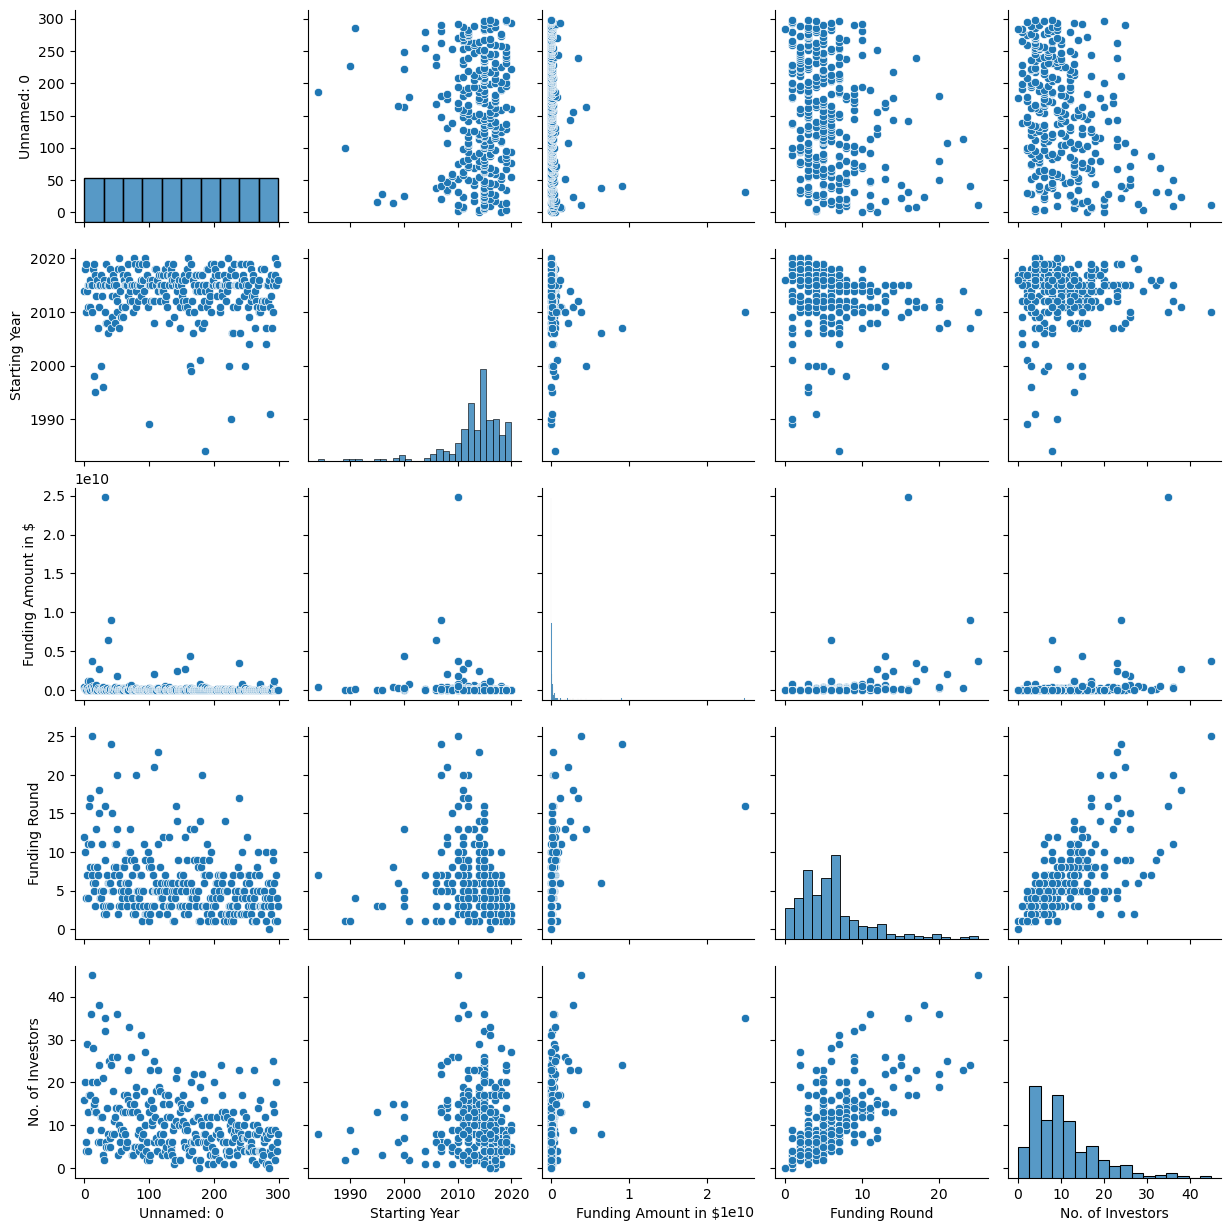

In [62]:
sns.pairplot(data)

C:\Users\Divo\AppData\Local\Temp\ipykernel_18968\2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

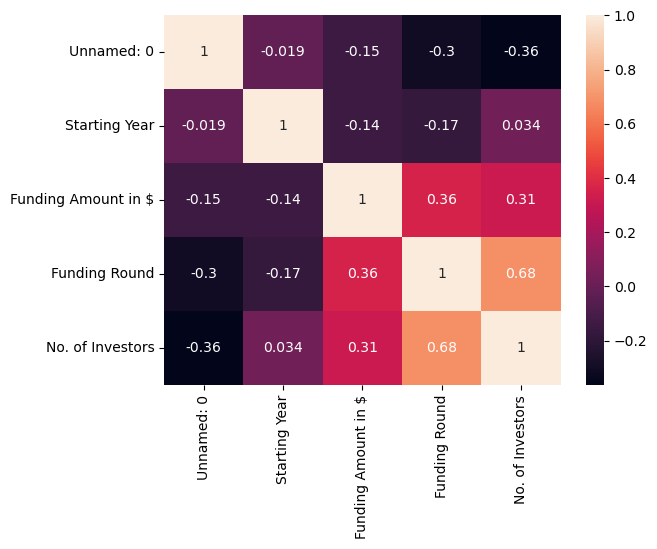

In [63]:
sns.heatmap(data.corr(),annot=True)

### 4. Data Cleaning and Feature Engineering

In [64]:
# Cleaning the No. of Employees column

data['No. of Employees'].replace('Nov-50', '11-50', inplace=True)
data['No. of Employees'].replace('1-Oct', '1-10', inplace=True)

In [65]:
# Droping the Unnamed Column
data.drop(columns=["Unnamed: 0"],inplace=True)

# Creating a column containing the Company Age from the Company Start Date 
data["Age"] = data["Starting Year"].max() - data["Starting Year"]

### 5. Expaloratory Analysis with Visuals

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '1984'),
  Text(1, 0, '1989'),
  Text(2, 0, '1990'),
  Text(3, 0, '1991'),
  Text(4, 0, '1995'),
  Text(5, 0, '1996'),
  Text(6, 0, '1998'),
  Text(7, 0, '1999'),
  Text(8, 0, '2000'),
  Text(9, 0, '2001'),
  Text(10, 0, '2004'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015'),
  Text(21, 0, '2016'),
  Text(22, 0, '2017'),
  Text(23, 0, '2018'),
  Text(24, 0, '2019'),
  Text(25, 0, '2020')])

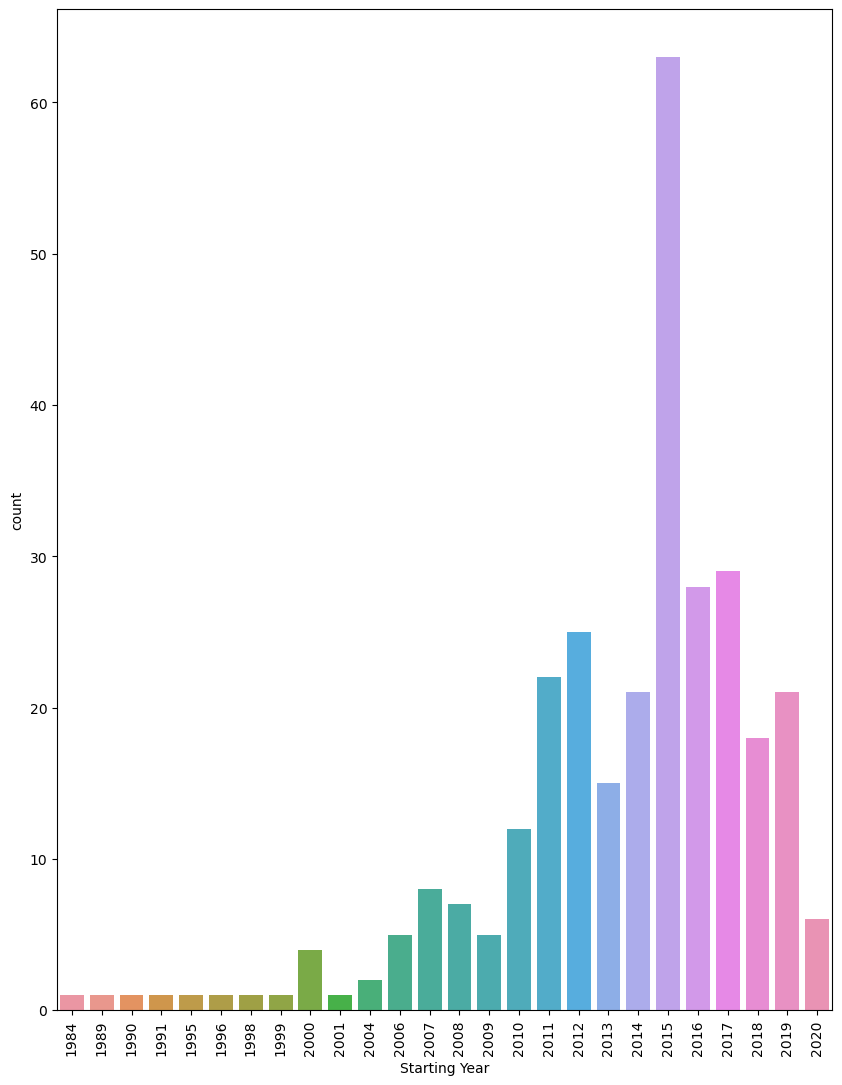

In [66]:
# Which year has the highest number of startups?
plt.figure(figsize=(10,13))
sns.countplot(x = 'Starting Year',data = data)
plt.xticks(rotation = 90)

##### 2015 has the highest number of startups

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Gurgaon'),
  Text(1, 0, 'Noida'),
  Text(2, 0, 'Mumbai'),
  Text(3, 0, 'Bengaluru'),
  Text(4, 0, 'Kormangala'),
  Text(5, 0, 'Hyderabad'),
  Text(6, 0, 'New Delhi'),
  Text(7, 0, 'Thane'),
  Text(8, 0, 'Pune'),
  Text(9, 0, 'Chennai'),
  Text(10, 0, 'Andheri'),
  Text(11, 0, 'Delhi'),
  Text(12, 0, 'Patna City'),
  Text(13, 0, 'Haryana'),
  Text(14, 0, 'Faridabad'),
  Text(15, 0, 'Ahmedabad'),
  Text(16, 0, 'Surat'),
  Text(17, 0, 'Kolkata'),
  Text(18, 0, 'Sohna'),
  Text(19, 0, 'Whitefield'),
  Text(20, 0, 'Kilpauk'),
  Text(21, 0, 'Azadpur'),
  Text(22, 0, 'Nungambakkam'),
  Text(23, 0, 'Jaipur')])

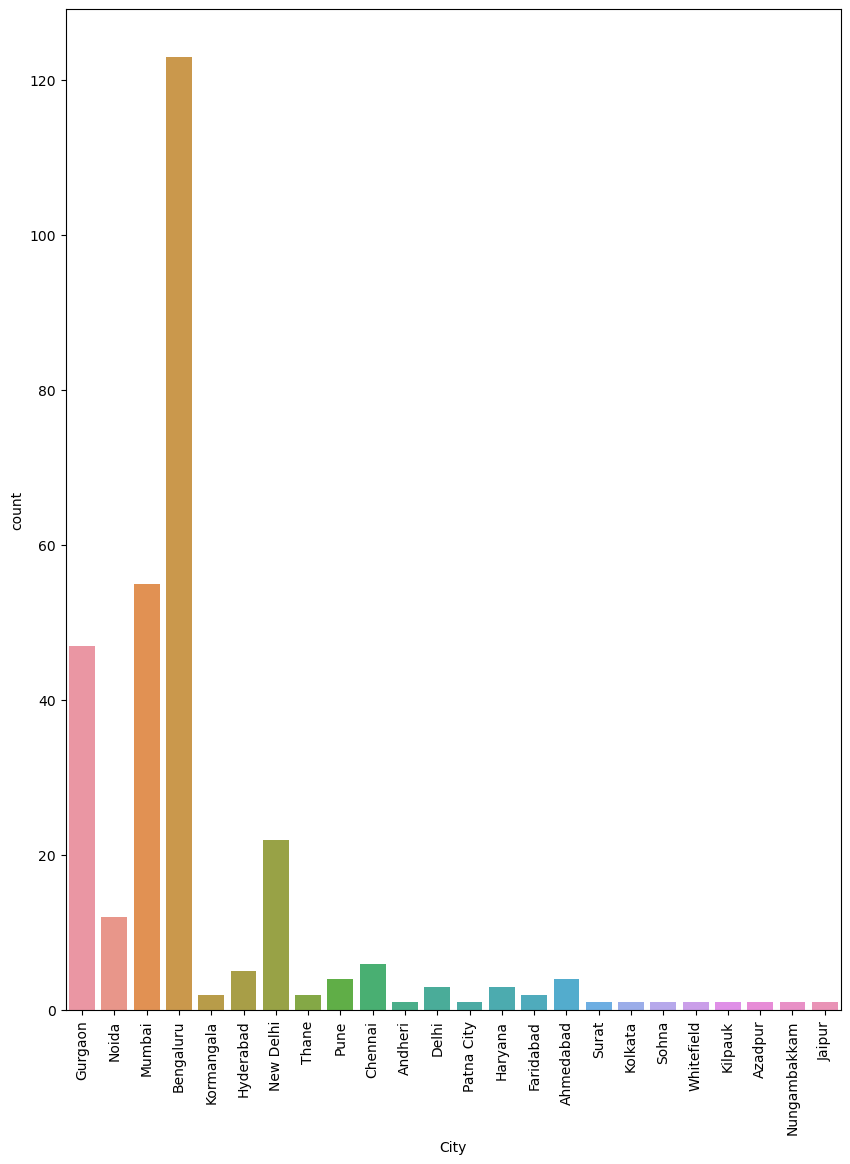

In [67]:
# Which City has the highest startups?
plt.figure(figsize=(10,13))
sns.countplot(x = 'City',data = data)
plt.xticks(rotation = 90)

##### Bengaluru has the highest startups density

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1001-5000'),
  Text(1, 0, '101-250'),
  Text(2, 0, '501-1000'),
  Text(3, 0, '5001-10000'),
  Text(4, 0, '11-50'),
  Text(5, 0, '251-500'),
  Text(6, 0, '10001+'),
  Text(7, 0, '51-100'),
  Text(8, 0, '1-10'),
  Text(9, 0, 'Not Available')])

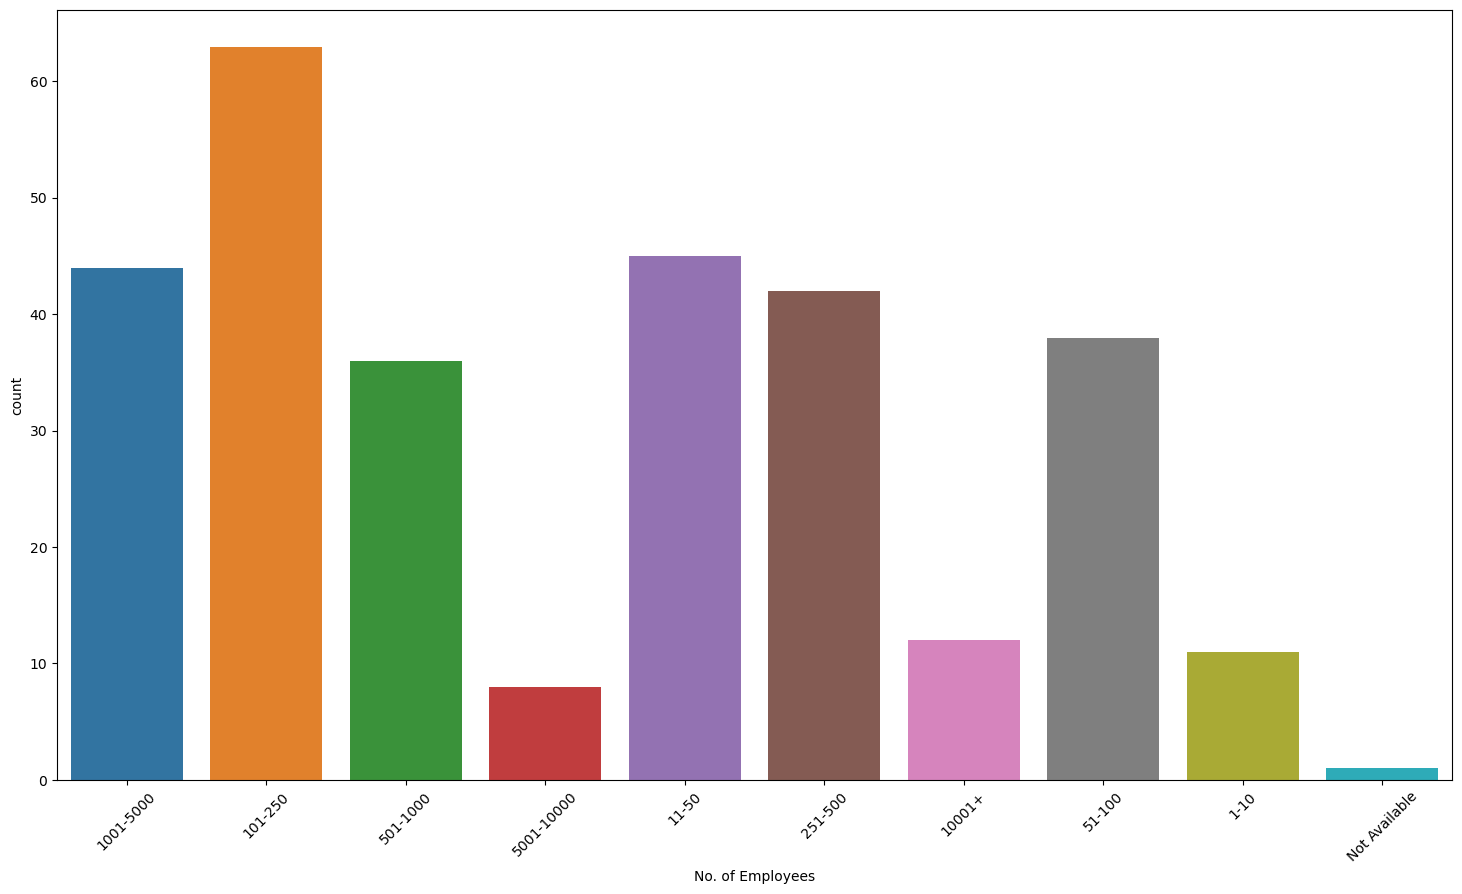

In [68]:
plt.figure(figsize=(18,10))
sns.countplot(x = "No. of Employees", data = data)
plt.xticks(rotation=45)

##### Most Startups has between 101 and 250 Employees

<Axes: xlabel='No. of Investors', ylabel='count'>

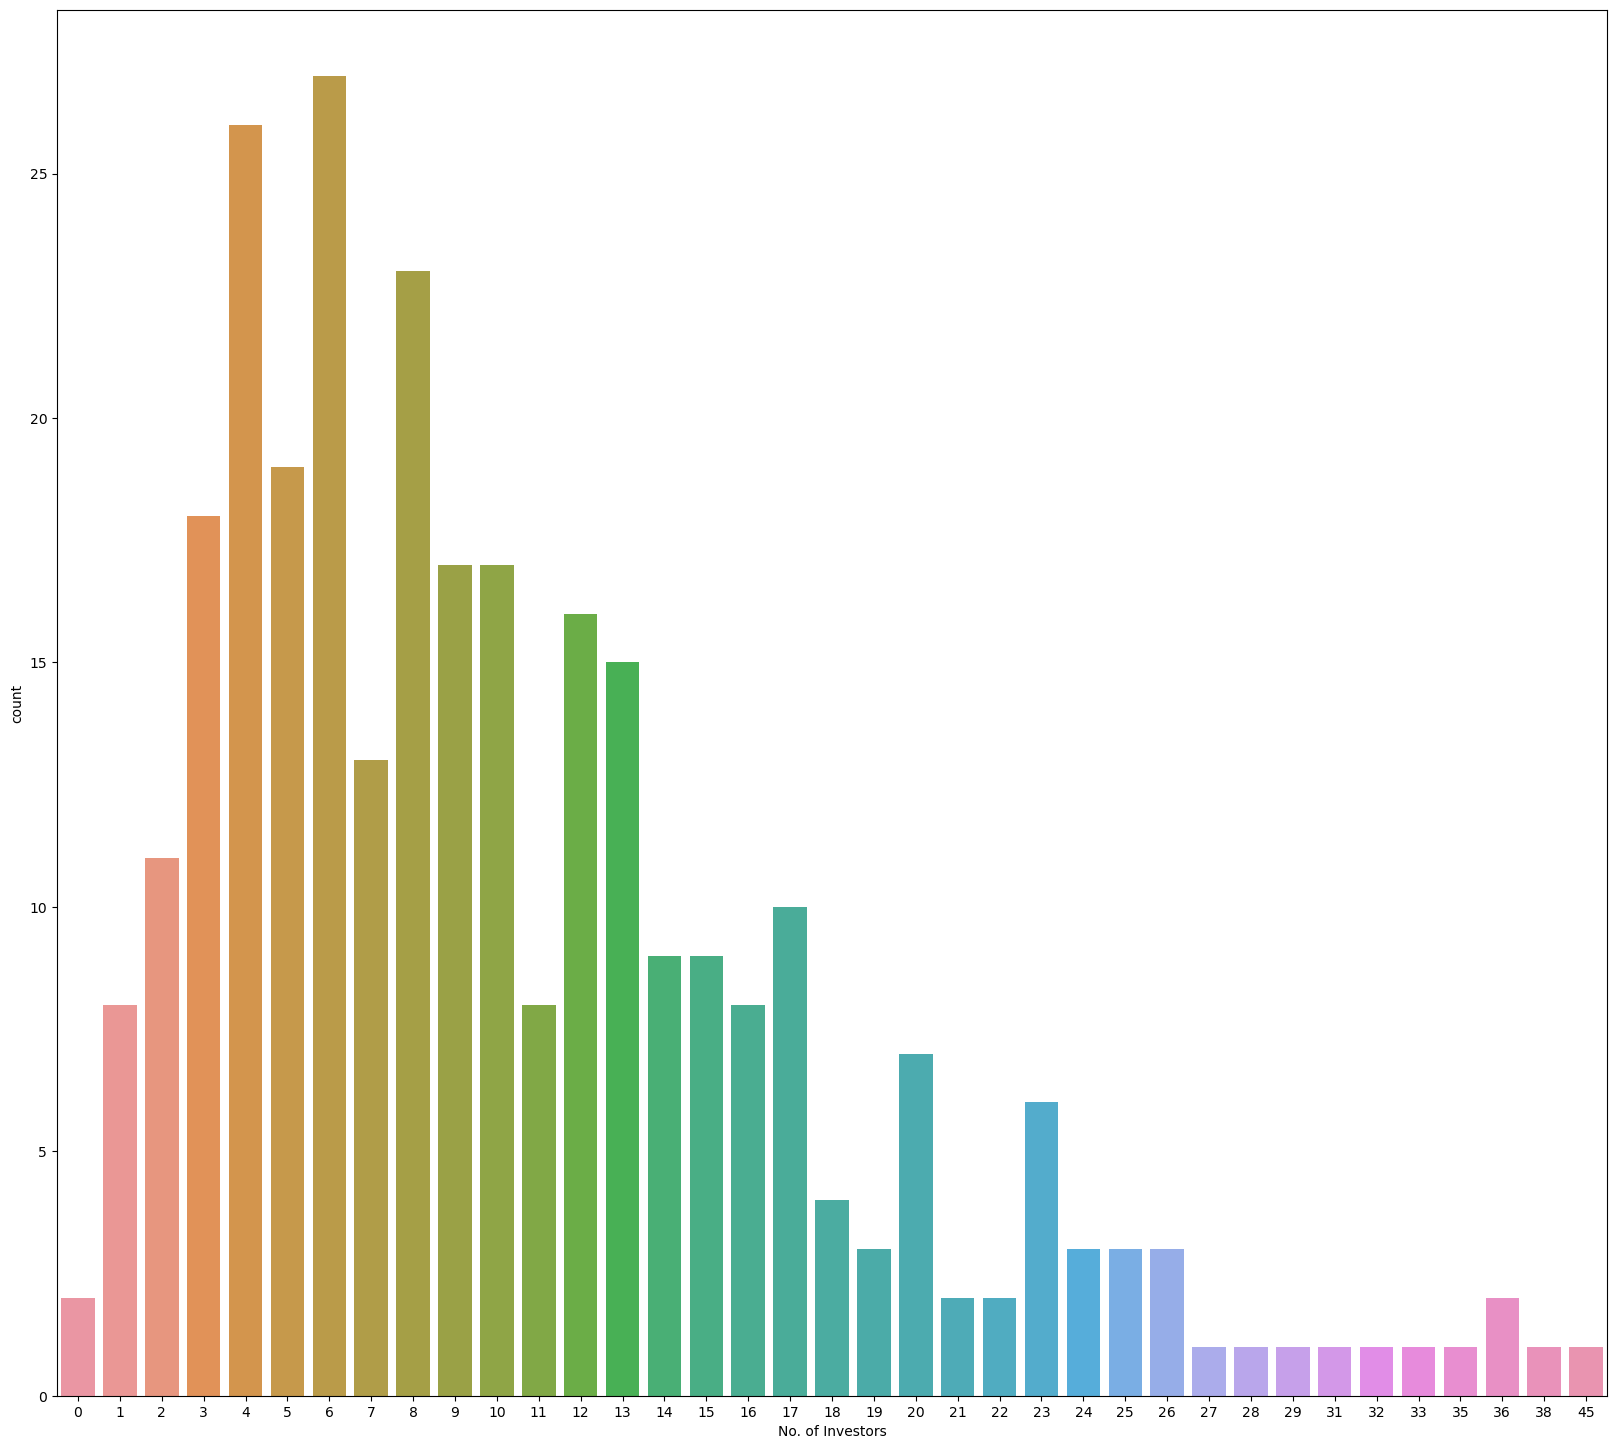

In [69]:
plt.figure(figsize=(20,18))
sns.countplot(x = 'No. of Investors',data = data)

##### Most Companies has 4 and 6 Investors|

### 6. Making the Model


In [70]:
data.columns

Index(['Company', 'City', 'Starting Year', 'No. of Employees',
       'Funding Amount in $', 'Funding Round', 'No. of Investors', 'Age'],
      dtype='object')

In [71]:
# Extracting Non-Object Features for the Model(s)
Features =['Starting Year', 'Funding Amount in $', 'Funding Round', 'No. of Investors', 'Age']

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[Features] = sc.fit_transform(data[Features])

c:\Users\Divo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Divo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


c:\Users\Divo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Divo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Divo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Divo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

Text(0, 0.5, 'WCSS')

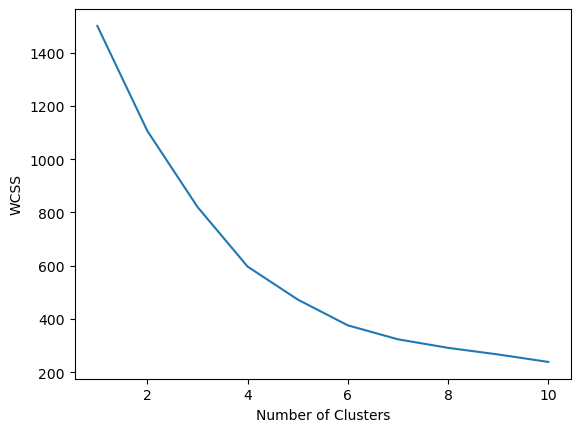

In [73]:
from sklearn.cluster import KMeans

# Using the Elbow Method to Obtain the Best Number of Clusters
clusters = np.arange(1,11)
wcss = []
for k in clusters:
    model = KMeans(n_clusters = k,init="k-means++",random_state=42)
    model.fit(data[Features])
    wcss.append(model.inertia_)

sns.lineplot(x = clusters,y = wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")


##### Optimal Number of Clusters is `3`

In [74]:
# Making a New Kmeans Model with 3 Clusters
Kmeans_model = KMeans(n_clusters = 3,init="k-means++",random_state=42)
# Fitting the data and storing the results in a new vector
Kmeans_model.fit(data[Features])

Kmeans_Clusters = Kmeans_model.labels_
# Adding the vector to the original data and labeling it for the kmeans model
data['Kmeans_Clusters'] = Kmeans_Clusters

data.head(5)

c:\Users\Divo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Divo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Company,City,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Age,Kmeans_Clusters
0,Urban Company,Gurgaon,0.118240,1001-5000,0.080595,1.420788,0.724966,-0.118240,0
1,Classplus,Noida,0.897843,101-250,-0.138590,0.948242,1.257052,-0.897843,0
2,Paytm,Noida,-0.661363,501-1000,-0.173679,-0.469396,-0.871290,0.661363,2
3,Apna,Mumbai,1.092743,101-250,-0.136165,-0.469396,-0.605247,-1.092743,2
4,Razorpay,Bengaluru,0.118240,1001-5000,0.031815,0.239423,2.454244,-0.118240,0


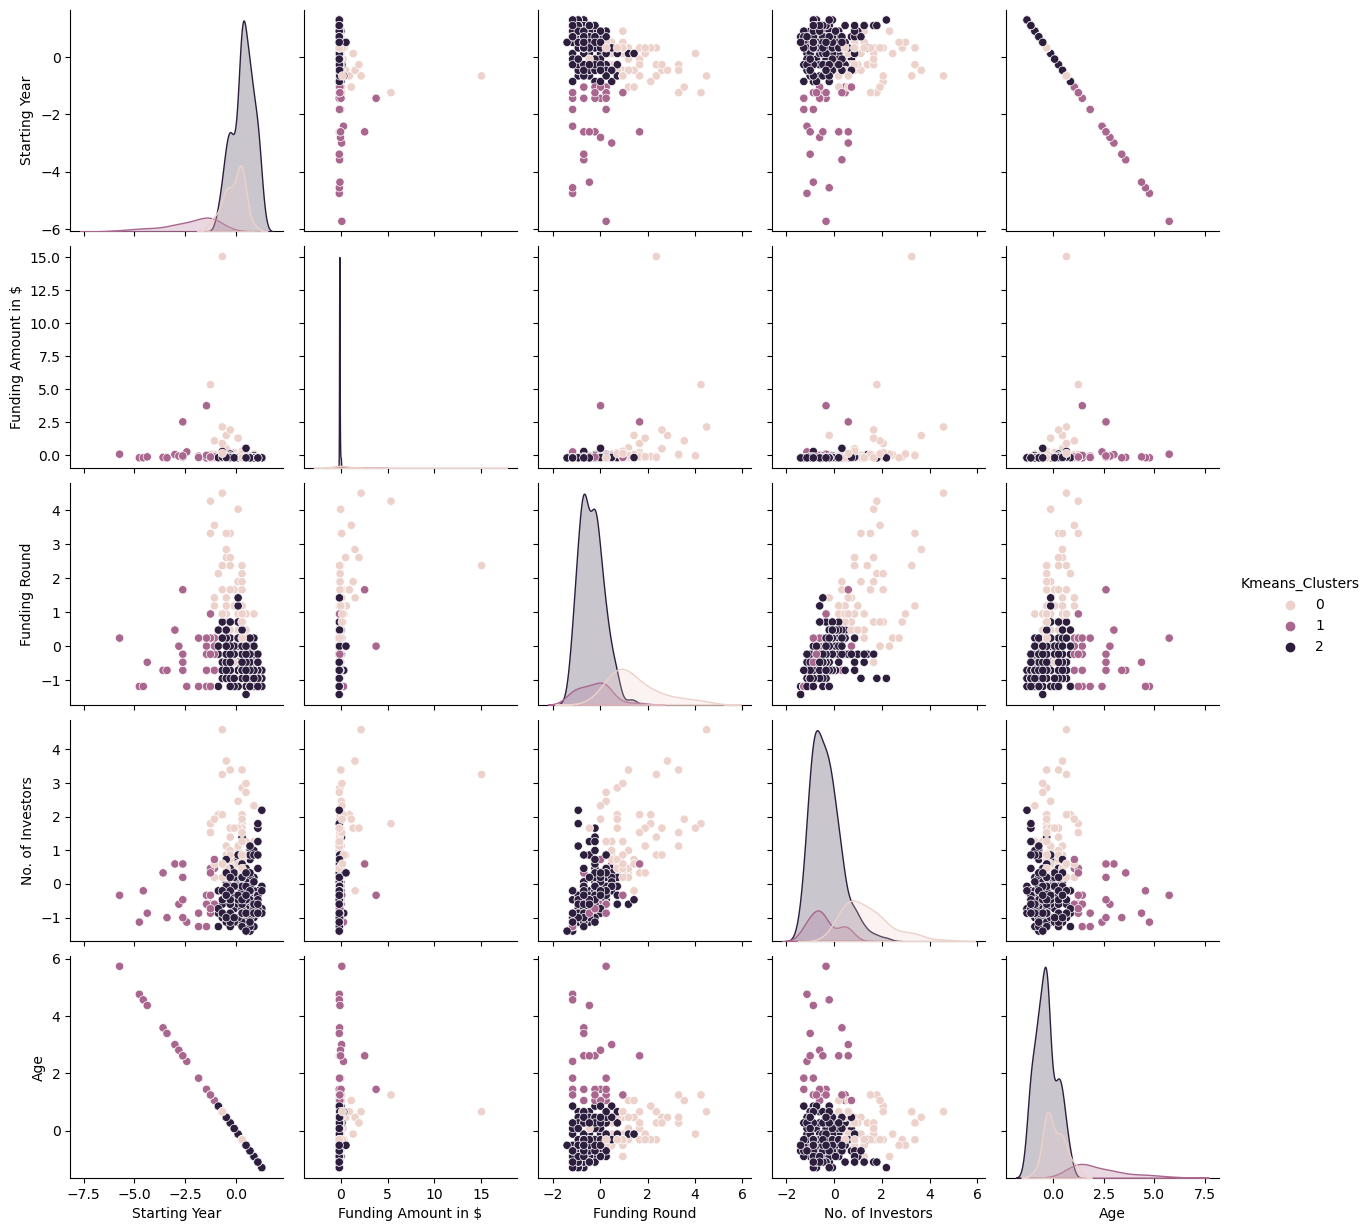

In [75]:
# Visualizing the new clusters
sns.pairplot(data = data, hue = 'Kmeans_Clusters')

In [76]:
# Trying DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 9, min_samples = 3)
dbscan.fit(data[Features])

dbscan_clusters = dbscan.labels_

data["DBSCAN Clusters"] = dbscan_clusters

data.head(5)

,Company,City,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Age,Kmeans_Clusters,DBSCAN Clusters
0,Urban Company,Gurgaon,0.118240,1001-5000,0.080595,1.420788,0.724966,-0.118240,0,0
1,Classplus,Noida,0.897843,101-250,-0.138590,0.948242,1.257052,-0.897843,0,0
2,Paytm,Noida,-0.661363,501-1000,-0.173679,-0.469396,-0.871290,0.661363,2,0
3,Apna,Mumbai,1.092743,101-250,-0.136165,-0.469396,-0.605247,-1.092743,2,0
4,Razorpay,Bengaluru,0.118240,1001-5000,0.031815,0.239423,2.454244,-0.118240,0,0


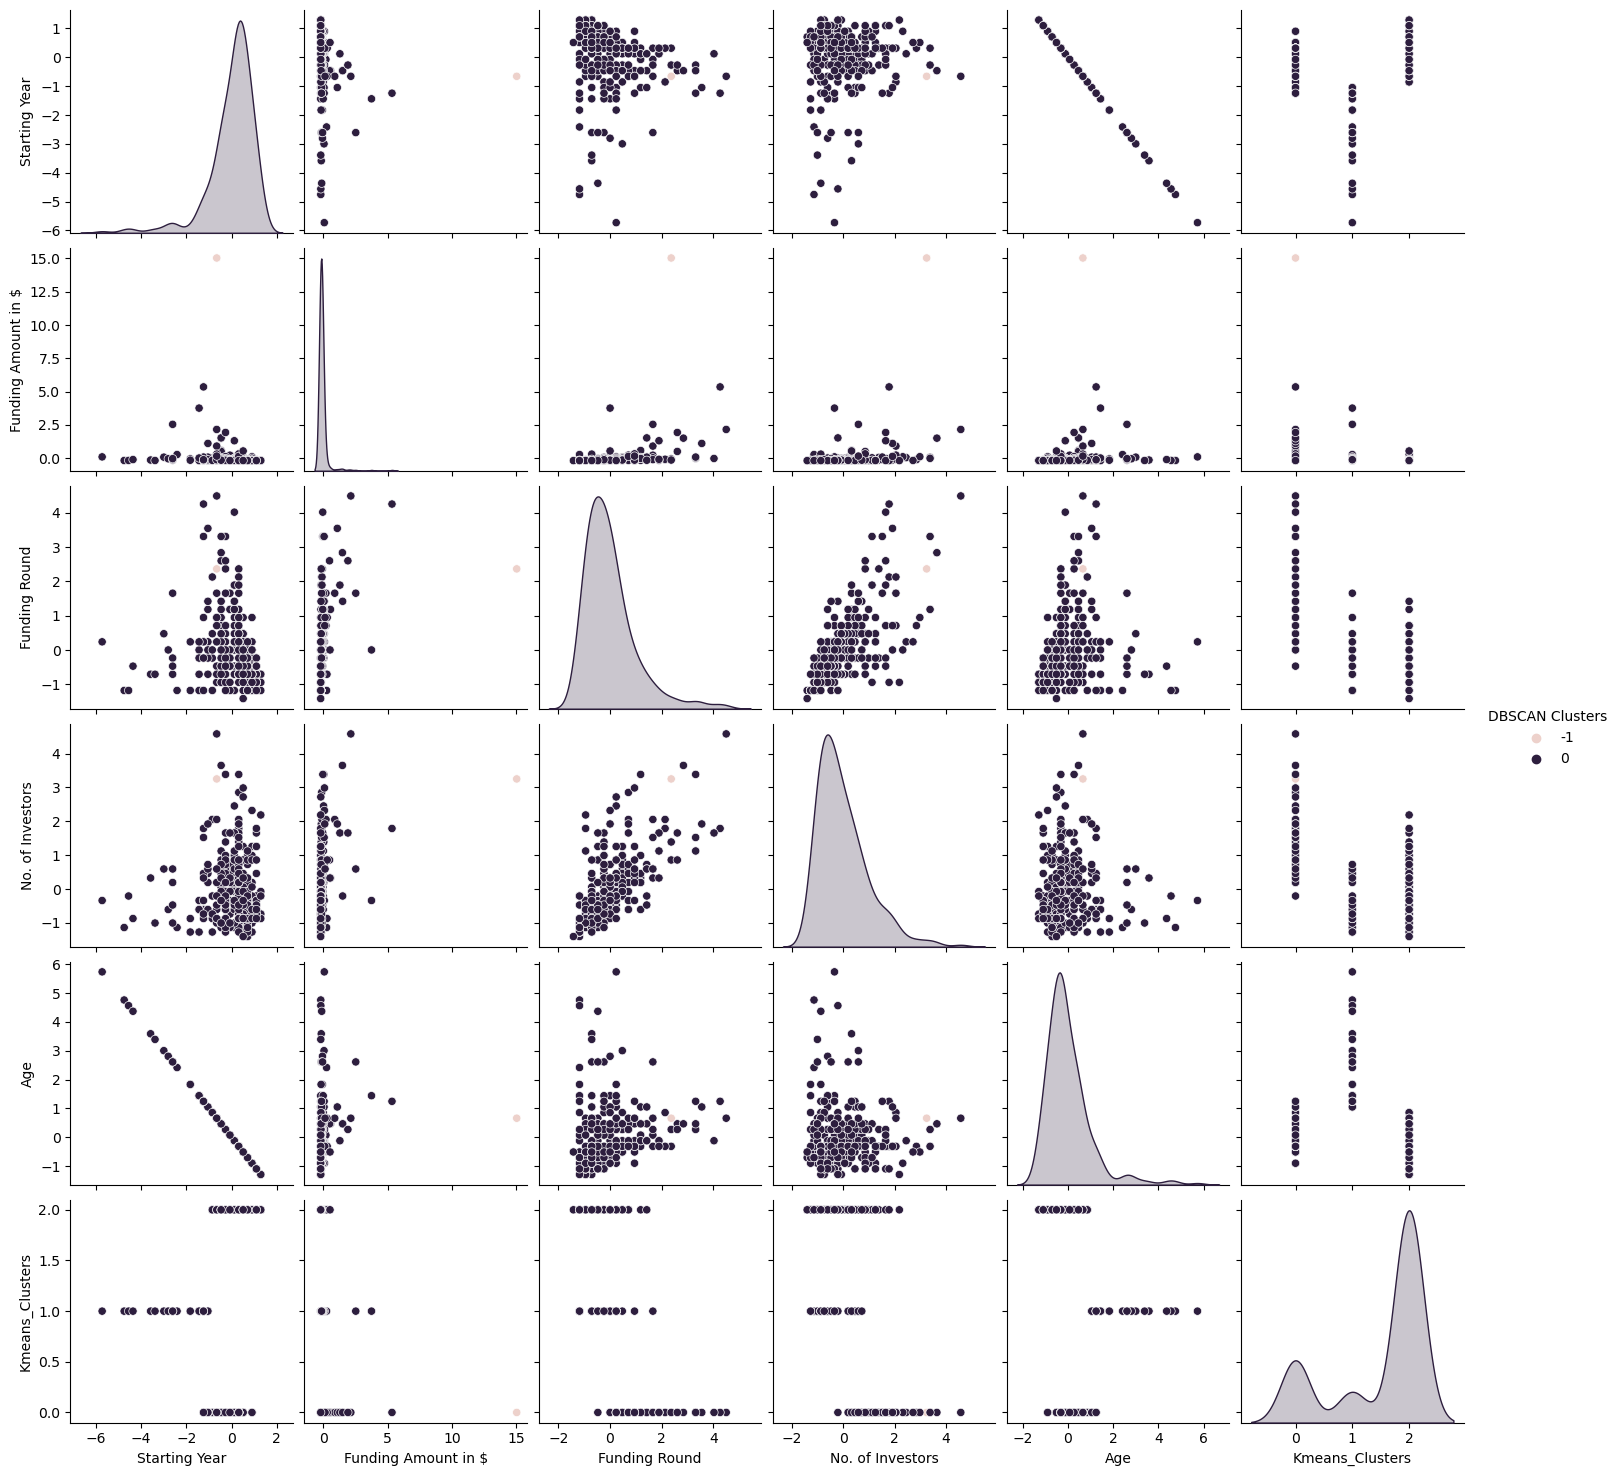

In [77]:
sns.pairplot(data = data, hue = 'DBSCAN Clusters')